In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=42
)

X = StandardScaler().fit_transform(X)

In [2]:
X

array([[ 0.34872081, -0.32220309],
       [ 0.4946184 ,  0.97627442],
       [-0.70604499, -0.69988719],
       ...,
       [ 1.07151617,  1.58730389],
       [ 1.46388209,  0.99000685],
       [ 0.89254067,  1.16970572]], shape=(750, 2))

In [3]:
import pandas as pd 
df = pd.DataFrame({'f1': X[:,0], 'f2': X[:,1]})

df.head()

,f1,f2
0,0.348721,-0.322203
1,0.494618,0.976274
2,-0.706045,-0.699887
3,-2.040514,-0.812233
4,0.753597,1.240520


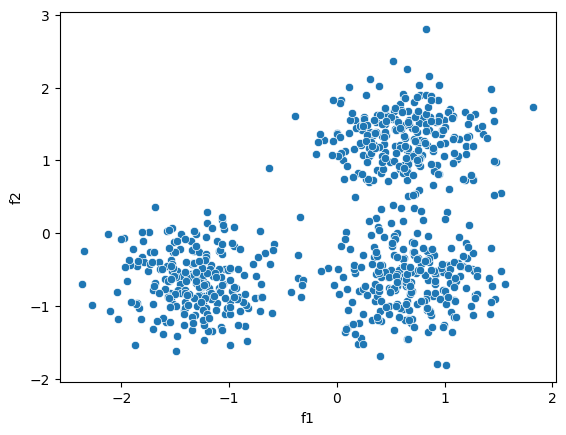

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(df, x='f1', y='f2')
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
ds = DBSCAN(eps=0.3, min_samples=10)
ds.fit(df)

,"eps eps: float, default=0.5The maximum distance between two samples for one to be consideredas in the neighborhood of the other. This is not a maximum boundon the distances of points within a cluster. This is the mostimportant DBSCAN parameter to choose appropriately for your data setand distance function. Smaller values generally lead to more clusters.",0.3
,"min_samples min_samples: int, default=5The number of samples (or total weight) in a neighborhood for a point tobe considered as a core point. This includes the point itself. If`min_samples` is set to a higher value, DBSCAN will find denser clusters,whereas if it is set to a lower value, the found clusters will be moresparse.",10
,"metric metric: str, or callable, default='euclidean'The metric to use when calculating distance between instances in afeature array. If metric is a string or callable, it must be one ofthe options allowed by :func:`sklearn.metrics.pairwise_distances` forits metric parameter.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors for DBSCAN... versionadded:: 0.17 metric *precomputed* to accept precomputed sparse matrix.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function... versionadded:: 0.19",None
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'The algorithm to be used by the NearestNeighbors moduleto compute pointwise distances and find nearest neighbors.'auto' will attempt to decide the most appropriate algorithmbased on the values passed to :meth:`fit` method.See :class:`~sklearn.neighbors.NearestNeighbors` documentation fordetails.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or cKDTree. This can affect the speedof the construction and query, as well as the memory requiredto store the tree. The optimal value dependson the nature of the problem.",30
,"p p: float, default=NoneThe power of the Minkowski metric to be used to calculate distancebetween points. If None, then ``p=2`` (equivalent to the Euclideandistance). When p=1, this is equivalent to Manhattan distance.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [7]:
df['clusters'] = ds.labels_
df.head()

,f1,f2,clusters
0,0.348721,-0.322203,0
1,0.494618,0.976274,0
2,-0.706045,-0.699887,1
3,-2.040514,-0.812233,1
4,0.753597,1.240520,0


In [8]:
df.clusters.value_counts()

clusters
 0    490
 1    242
-1     18
Name: count, dtype: int64

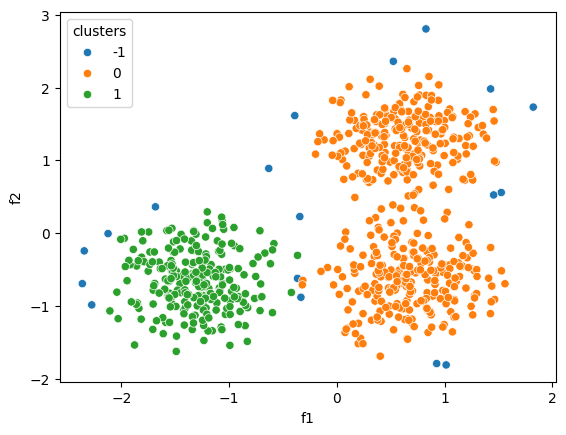

In [9]:
sns.scatterplot(df, x='f1', y='f2', hue='clusters', palette='tab10')
plt.show()